In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Dataset Head:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

Class distribution:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


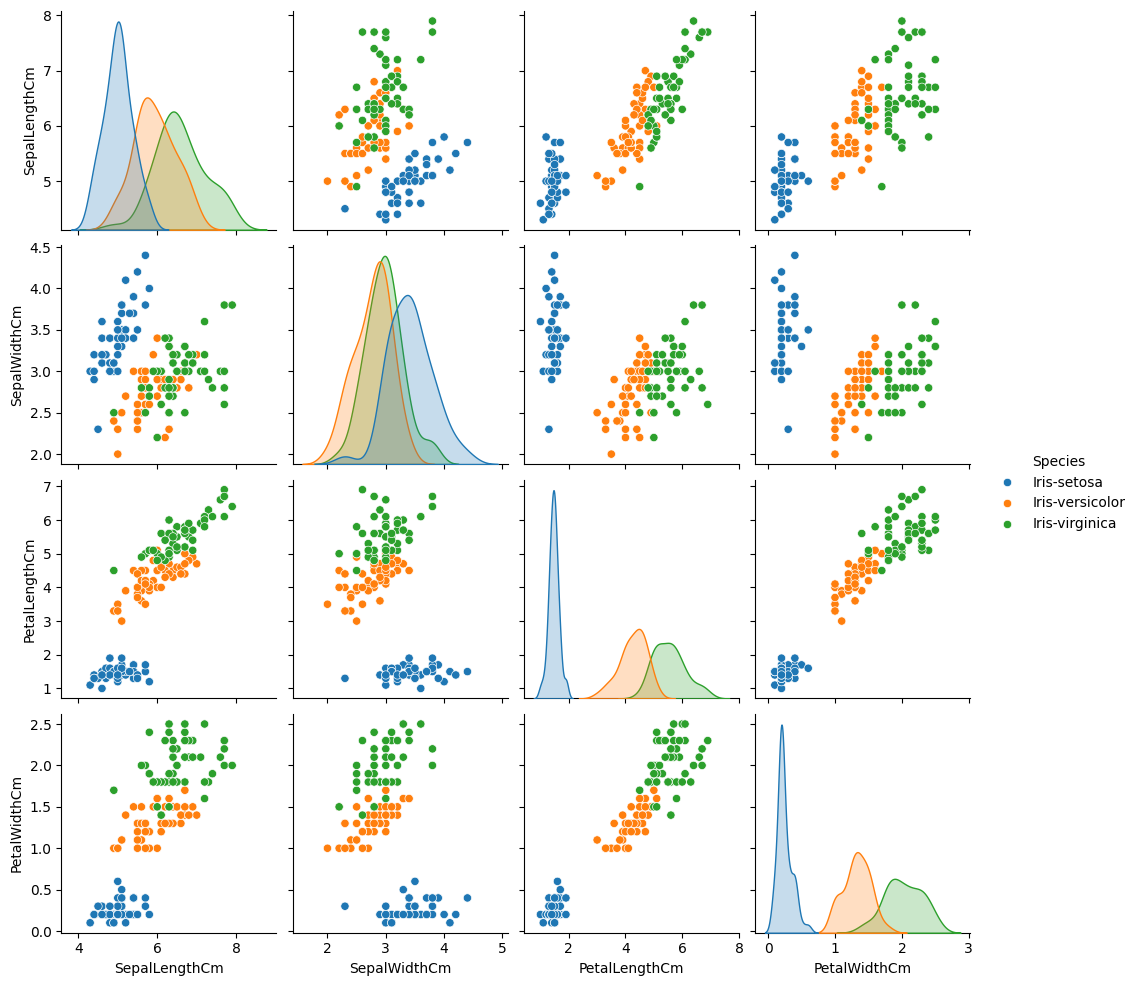

In [2]:
data = pd.read_csv('Iris.csv')  # Make sure the CSV is in the same folder
if 'Id' in data.columns:
    data = data.drop('Id', axis=1)

print("Dataset Head:\n", data.head())
print("\nClass distribution:\n", data['Species'].value_counts())

# =========================
# BLOCK 3: Pairplot Visualization
# =========================
sns.pairplot(data, hue='Species')
plt.show()

In [3]:
X = data.drop('Species', axis=1)
y = data['Species']

# =========================
# BLOCK 5: Train-Test Split & Scaling
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

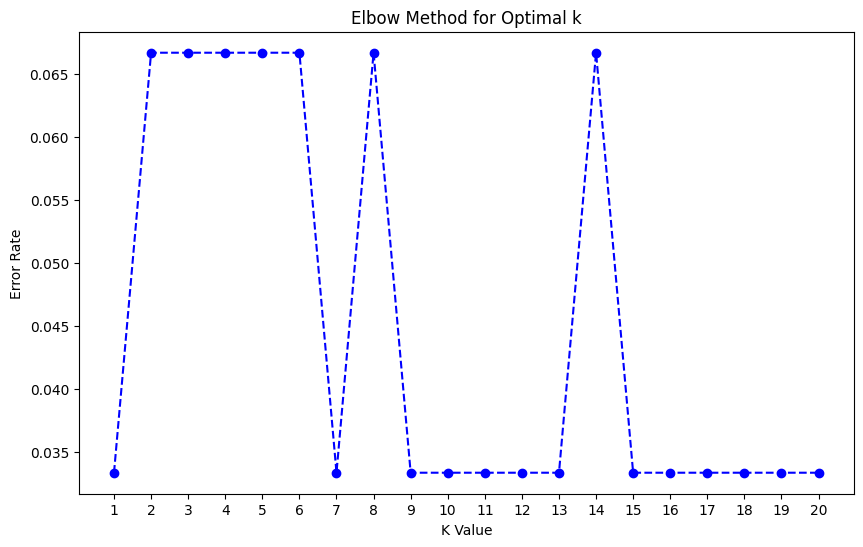

Accuracy: 0.9333333333333333

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30


Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


In [4]:
error_rate = []

# Try k values from 1 to 20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, pred_k)
    error_rate.append(error)

# Plot the elbow graph
plt.figure(figsize=(10,6))
plt.plot(range(1, 21), error_rate, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(range(1,21))
plt.show()

# =========================
# BLOCK 7: Train KNN with chosen k (from elbow, e.g., k=5)
# =========================
best_k = 5  # Replace with your choice from elbow graph
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# =========================
# BLOCK 8: Evaluate Model
# =========================
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
